In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [15]:
X = df.drop('target', axis=1)
y = df['target']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


In [20]:
# Escalado con StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# Verificar escalado
print("Media de X_train_scaled (primeras 5 características):", np.mean(X_train_scaled, axis=0)[:5])
print("Desv. estándar de X_train_scaled (primeras 5 características):", np.std(X_train_scaled, axis=0)[:5])


Media de X_train_scaled (primeras 5 características): [ 2.67792488e-16 -5.53437809e-16 -6.18154327e-16  2.07539178e-16
  8.92641628e-18]
Desv. estándar de X_train_scaled (primeras 5 características): [1. 1. 1. 1. 1.]


In [21]:
# Entrenamiento de modelo de regresión logística
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
# Predicciones
y_pred = model.predict(X_test_scaled)

# Evaluación del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nEvaluación del Modelo:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Evaluación del Modelo:
Accuracy: 0.9766081871345029
Precision: 0.9727272727272728
Recall: 0.9907407407407407

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.97      0.99      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



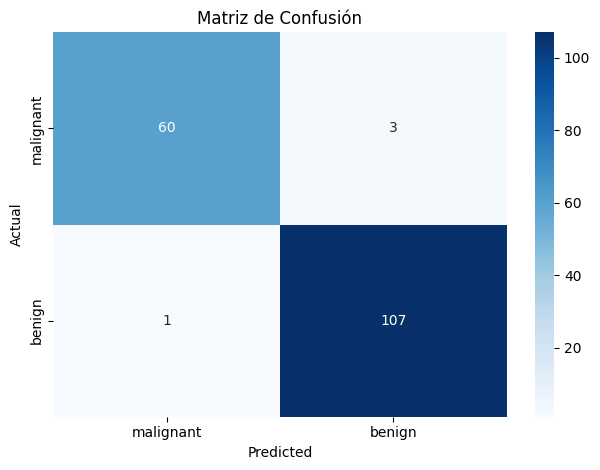

In [27]:
# Matriz de confusión\plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()
